In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customers_df = pd.read_csv("Income Data.csv")
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [4]:
customers_df.head(5)

income    age
0  41100.0  48.75
1  54100.0  28.10
2  47800.0  46.75
3  19100.0  40.25
4  18200.0  35.80

C:\Users\gsripath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gsripath\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


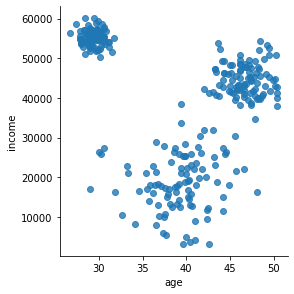

In [3]:
sn.lmplot("age","income",data = customers_df, fit_reg = False, size=4)

# K- Means clustering

In [4]:
from sklearn.cluster import KMeans

clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(n_clusters=3)

In [5]:
customers_df["Cluster_id"] = clusters.labels_

In [6]:
customers_df[0:5]

income    age  Cluster_id
0  41100.0  48.75           2
1  54100.0  28.10           1
2  47800.0  46.75           2
3  19100.0  40.25           0
4  18200.0  35.80           0

# Now, plot the customer segmentation done with the above K-Means clustering tecchnique.

C:\Users\gsripath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gsripath\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


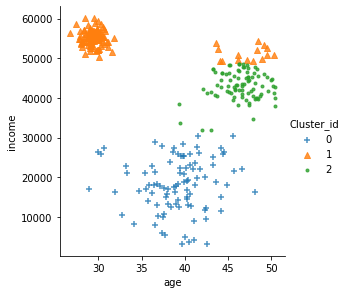

In [7]:
markers = ['+', '^', '.']

sn.lmplot("age","income", data = customers_df, hue = "Cluster_id", fit_reg = False, markers = markers, size = 4)

# Now, normalize the features and try segmenting again as the scales of age and income are different.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cust_df = scaler.fit_transform(customers_df[['age','income']])

scaled_cust_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [9]:
clusters_new = KMeans(3, random_state = 42)

clusters_new.fit(scaled_cust_df)

customers_df["clusterid_new"] = clusters_new.labels_




C:\Users\gsripath\AppData\Roaming\Python\Python36\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


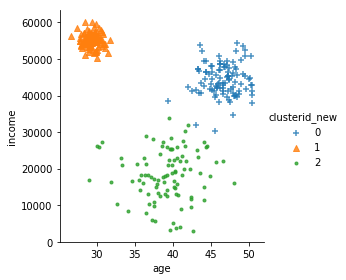

In [14]:
sn.lmplot("age","income", data = customers_df, hue = "clusterid_new", fit_reg = False, markers = markers, size = 4)

In [10]:
clusters_new.cluster_centers_

array([[ 1.08753708,  0.29682871],
       [-1.20817959,  0.97471684],
       [ 0.09073855, -1.32005197]])

# Cluster centers and interpreting the clusters
1. Cluster center explains the characteristic of the cluster and helps us to interpret the cluster.

In [10]:
customers_df.groupby('clusterid_new')['age','income'].agg(["mean"]).reset_index()

<ipython-input-10-6a4bfed8d1f2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customers_df.groupby('clusterid_new')['age','income'].agg(["mean"]).reset_index()


clusterid_new        age        income
                      mean          mean
0             0  46.627184  44308.737864
1             1  29.384000  55204.000000
2             2  39.140206  18321.649485

In [11]:
# according to the code in book. he took original data centroids here. not the scaled data. 
customers_df.groupby('Cluster_id')['age','income'].agg(["mean"]).reset_index()

C:\Users\gsripath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Cluster_id        age        income
                   mean          mean
0          0  39.174479  18144.791667
1          1  31.700435  54675.652174
2          2  46.419101  43053.932584